In [ ]:
!pip install nvidia-modulus nvidia-modulus-sym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.9/291.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.6/582.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.1/772.1 kB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

# **Load libraries**

In [1]:
# install three Python packages: For using BERT, pre-processing text and ready-to-use datasets  in NLP
!pip install transformers sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset
from google.colab import drive
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim  #optimization algorithms for training neural networks
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model_repo = 'google/mt5-base'
model_path = '/content/drive/My Drive/mt5_translation.pt'
max_seq_len = 20

# **Load Tokenizer and Visualize Samples of the Tokens**

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


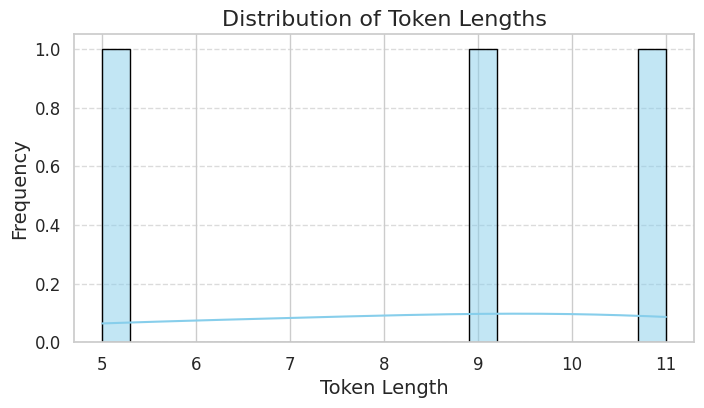

In [7]:
#selects an appropriate tokenizer based on the model architecture
tokenizer = AutoTokenizer.from_pretrained(model_repo)

import seaborn as sns

# Sample text data
corpus = ["Sample sentence 1.", "Another sample sentence with more words.", "And a third sentence for illustration."]

# Tokenize the corpus using the selected tokenizer
token_lengths = []
for sentence in corpus:
    tokens = tokenizer.tokenize(sentence)
    token_lengths.append(len(tokens))

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of token lengths
plt.figure(figsize=(8, 4))
sns.histplot(token_lengths, bins=20, color='skyblue', edgecolor='black', kde=True)
plt.xlabel('Token Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Token Lengths', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Load The Model**

In [8]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# **These are 13 language codes :**
    
    "bg" - Bulgarian
    "en" - English
    "en_tok" - English (Tok Pisin, a creole language spoken in Papua New Guinea)
    "fil" - Filipino (Tagalog)
    "hi" - Hindi
    "id" - Indonesian
    "ja" - Japanese
    "khm" - Khmer (Cambodian)
    "lo" - Lao
    "ms" - Malay
    "my" - Burmese
    "th" - Thai
    "vi" - Vietnamese
    "zh" - Chinese (Mandarin)

# **Test Snipt**

In [10]:
token_ids = tokenizer.encode(
    '<zh> This will be translated to Chinese!',
    return_tensors='pt').cuda()
#IDs generated by tokenizing the input text
print("token_ids: ", token_ids)

#IDs generated by the model based on the input
model_out = model.generate(token_ids)
print("model_out: ", model_out)

# converting the token IDs in model_out back into human-readable text using the tokenizer.
output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print("output_text: ", output_text)

token_ids:  tensor([[ 1042, 12001,   669,  1494,   898,   390, 37194,   285,   288, 17542,
           309,     1]], device='cuda:0')


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


model_out:  tensor([[     0, 250099,    669,    259,  22292,    285,    607,      1]],
       device='cuda:0')
output_text:  <pad> <extra_id_0>> Retrieved 2019</s>


In [11]:
 #IDs generated by the tokenizer for the input string.
example_input_str = '<zh> This is just a test .'

input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

#Convert Token IDs to Tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[ 1042, 12001,   669,  1494,   339,  1627,   259,   262,  2978,   259,
           260,     1]])
Tokens: ['▁<', 'zh', '>', '▁This', '▁is', '▁just', '▁', 'a', '▁test', '▁', '.', '</s>']


# **Sort the tokens**

In [12]:
#sorts the vocabulary of the tokenizer based on the token IDs
sorted(tokenizer.vocab.items(), key=lambda x: x[1])

[('<pad>', 0),
 ('</s>', 1),
 ('<unk>', 2),
 ('<0x00>', 3),
 ('<0x01>', 4),
 ('<0x02>', 5),
 ('<0x03>', 6),
 ('<0x04>', 7),
 ('<0x05>', 8),
 ('<0x06>', 9),
 ('<0x07>', 10),
 ('<0x08>', 11),
 ('<0x09>', 12),
 ('<0x0A>', 13),
 ('<0x0B>', 14),
 ('<0x0C>', 15),
 ('<0x0D>', 16),
 ('<0x0E>', 17),
 ('<0x0F>', 18),
 ('<0x10>', 19),
 ('<0x11>', 20),
 ('<0x12>', 21),
 ('<0x13>', 22),
 ('<0x14>', 23),
 ('<0x15>', 24),
 ('<0x16>', 25),
 ('<0x17>', 26),
 ('<0x18>', 27),
 ('<0x19>', 28),
 ('<0x1A>', 29),
 ('<0x1B>', 30),
 ('<0x1C>', 31),
 ('<0x1D>', 32),
 ('<0x1E>', 33),
 ('<0x1F>', 34),
 ('<0x20>', 35),
 ('<0x21>', 36),
 ('<0x22>', 37),
 ('<0x23>', 38),
 ('<0x24>', 39),
 ('<0x25>', 40),
 ('<0x26>', 41),
 ('<0x27>', 42),
 ('<0x28>', 43),
 ('<0x29>', 44),
 ('<0x2A>', 45),
 ('<0x2B>', 46),
 ('<0x2C>', 47),
 ('<0x2D>', 48),
 ('<0x2E>', 49),
 ('<0x2F>', 50),
 ('<0x30>', 51),
 ('<0x31>', 52),
 ('<0x32>', 53),
 ('<0x33>', 54),
 ('<0x34>', 55),
 ('<0x35>', 56),
 ('<0x36>', 57),
 ('<0x37>', 58),
 ('<0x38>',

# **Load the Dataset**

In [9]:
# Source: https://huggingface.co/datasets/alt
dataset = load_dataset('alt')

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [13]:
#label train and test datasets
train_dataset = dataset['train']
test_dataset = dataset['test']

In [14]:
#Accessing train_dataset
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

In [15]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'fil':'<fil>',
    'ja': '<jp>',
    'th': '<th>',
    'zh': '<zh>'
}

In [16]:
#value is a list of special tokens obtained from the values of LANG_TOKEN_MAPPING
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)

#ensures that the model's embedding layer is compatible with the modified vocabulary
model.resize_token_embeddings(len(tokenizer))

Embedding(250105, 768)

token_ids:  tensor([[250104,   1494,    339,   1627,    259,    262,   2978,    259,    260,
              1,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0]])
tokens:  ['<zh>', '▁This', '▁is', '▁just', '▁', 'a', '▁test', '▁', '.', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


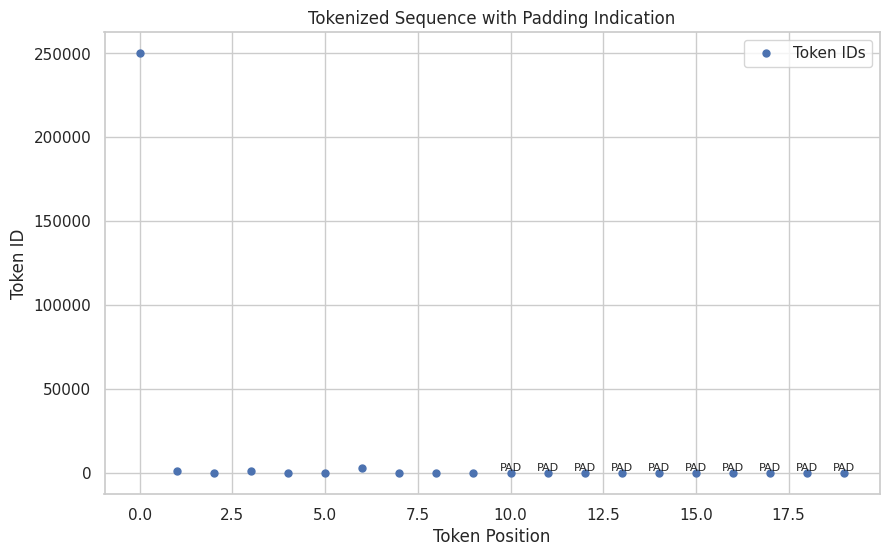

In [18]:
# tokenizes the input string
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt', padding='max_length',
    truncation=True, max_length=max_seq_len)
print("token_ids: ", token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print("tokens: ", tokens)
#Tokens without ▁ Prefix : a, .

# Plot token IDs with padding indication
plt.figure(figsize=(10, 6))
plt.plot(token_ids[0], marker='o', markersize=5, linestyle='', label='Token IDs')

# Add padding indication
for i, token_id in enumerate(token_ids[0]):
    if token_id == tokenizer.pad_token_id:
        plt.text(i, token_id, 'PAD', ha='center', va='bottom', fontsize=8)

plt.xlabel('Token Position')
plt.ylabel('Token ID')
plt.title('Tokenized Sequence with Padding Indication')
plt.legend()
plt.grid(True)
plt.show()

# **Tokenizes and encodes the input text with a target language**

In [19]:
# Tokenizes and encodes the input text with a target language
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

# Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

#Returns the token IDs of the encoded input text.
  return input_ids[0]

#tokenizes and encodes the target text.
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  #Returns the token IDs of the encoded target text
  return token_ids[0]

# prepares translation data for a batch.
def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

#transforms a batch of translation data
def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    # continue to the next translation set.
    if formatted_data is None:
      continue

    #append to arrays
    input_ids, target_ids = formatted_data

    #adding one or more singleton dimensions
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  #Concatenate the lists of input and target token IDs
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle() #to randomize the order of samples.
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    # transform the raw batch into input and target token
    # the generator is iterated over, it produces one batch of transformed data.
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

# **Test the previous functions**

<th> ▁Natal o ▁ng ▁Italy a ▁ang ▁Portugal ▁sa ▁punto s ▁na ▁3 1-5 ▁sa ▁ Grupo ng ▁C ▁no ong ▁2007 ▁sa ▁Panda ig di gang ▁la ro ▁ng ▁Rag bi ▁sa ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ อิตาลี ได้ เอาชนะ โปร ตุ เก ส ด้วย คะแนน 31 ต่อ 5 ▁ ในกลุ่ม c ▁ ของ การแข่งขัน รัก บี้ เ วิ ลด์ ค ัพ ปี 2007 ▁ที่ สนาม ปา ร์ก เด แพ ร ็ง ส์ ▁ที่ กรุง ปา รีส ▁ประเทศ ฝรั่งเศส </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

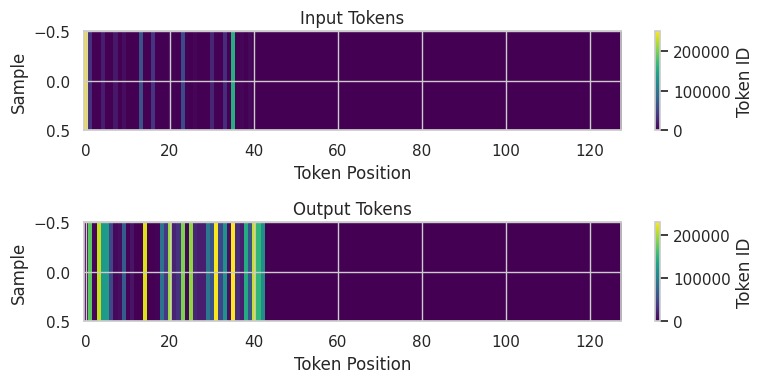

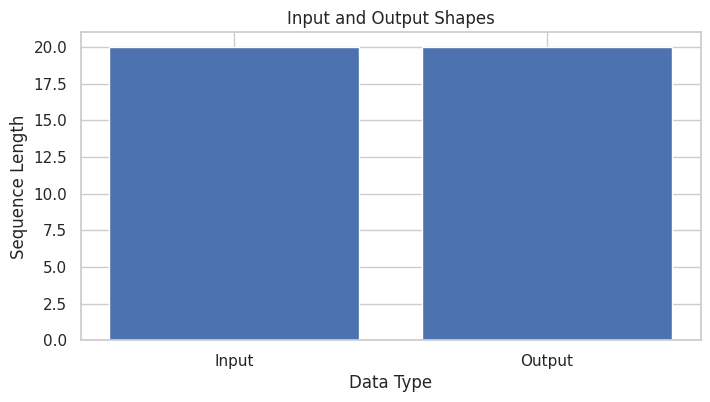

Input shape: torch.Size([8, 20])
Output shape: torch.Size([8, 20])


In [20]:
# Testing `format_translation_data`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Plot input tokens
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.title("Input Tokens")
plt.imshow([in_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

# Plot output tokens
plt.subplot(2, 1, 2)
plt.title("Output Tokens")
plt.imshow([out_ids], cmap='viridis', aspect='auto')
plt.colorbar(label='Token ID')
plt.xlabel('Token Position')
plt.ylabel('Sample')

plt.tight_layout()
plt.show()

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)

# Plot input and output shapes
plt.figure(figsize=(8, 4))
plt.bar(['Input', 'Output'], [data_batch[0].shape[1], data_batch[1].shape[1]])
plt.title('Input and Output Shapes')
plt.xlabel('Data Type')
plt.ylabel('Sequence Length')
plt.show()
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

# **Finetuning using BERT**

In [21]:
# Save the model's state dictionary to the specified file
torch.save(model.state_dict(), model_path)


In [22]:
#loading the saved model
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [23]:
# Constants
n_epochs = 8
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4 #equivalent to 5 * 10^(-4), which equals 0.0005
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)#prevent large updates to the model's parameters at the beginning of training

In [24]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)#inc lr from 0 during the warm-up phase and then linearly dec it towards 0 during the remaining training steps.

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [25]:
#computing the average loss over a specified number of batches
losses = []

In [26]:
#evaluate a given model on a dataset
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  # iterate over batches of data
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    #Forward Propagation
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [28]:
def calculate_accuracy(model, dataset):
    correct_predictions = 0
    total_predictions = 0

    # Set the model to evaluation mode
    model.eval()

    # Iterate over the dataset
    data_generator = get_data_generator(dataset, LANG_TOKEN_MAPPING, tokenizer, batch_size)
    for input_batch, label_batch in data_generator:
        # Forward pass
        with torch.no_grad():
            model_out = model(input_ids=input_batch, labels=label_batch)

        # Get predicted labels
        predicted_labels = torch.argmax(model_out.logits, dim=-1)

        # Count correct predictions
        correct_predictions += (predicted_labels == label_batch).sum().item()
        total_predictions += label_batch.size(0)

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions
    return accuracy


In [ ]:
# Initialize lists to store losses and accuracies
losses = []
accuracies = []

# Training loop
for epoch_idx in range(n_epochs):
    # Randomize data order
    data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, batch_size)

    for batch_idx, (input_batch, label_batch) in tqdm_notebook(enumerate(data_generator), total=n_batches):
        optimizer.zero_grad()  # Zero gradients

        # Forward propagation
        model_out = model(input_ids=input_batch, labels=label_batch)

        # Calculate loss and update weights
        loss = model_out.loss
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Calculate accuracy
        accuracy = calculate_accuracy(model, test_dataset)
        accuracies.append(accuracy)

        # Print training update info
        if (batch_idx + 1) % print_freq == 0:
            avg_loss = np.mean(losses[-print_freq:])
            print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | Accuracy: {:.3f} | lr: {}'.format(
                epoch_idx+1, batch_idx+1, avg_loss, accuracy, scheduler.get_last_lr()[0]))

        if (batch_idx + 1) % checkpoint_freq == 0:
            test_loss = eval_model(model, test_dataset)
            print('Saving model with test loss of {:.3f}'.format(test_loss))
            torch.save(model.state_dict(), model_path)

# Save the model at the end of training
torch.save(model.state_dict(), model_path)

<ipython-input-29-717d8fb9f401>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_idx, (input_batch, label_batch) in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 11.435 | Accuracy: 2.523 | lr: 0.00029444444444444445
Epoch: 1 | Step: 100 | Avg. loss: 6.155 | Accuracy: 4.446 | lr: 0.000499274391605269
Epoch: 1 | Step: 150 | Avg. loss: 4.882 | Accuracy: 5.503 | lr: 0.000496483590087073
Epoch: 1 | Step: 200 | Avg. loss: 4.368 | Accuracy: 6.185 | lr: 0.000493692788568877
Epoch: 1 | Step: 250 | Avg. loss: 3.978 | Accuracy: 6.517 | lr: 0.000490901987050681
Epoch: 1 | Step: 300 | Avg. loss: 3.886 | Accuracy: 6.839 | lr: 0.00048811118553248494
Epoch: 1 | Step: 350 | Avg. loss: 3.766 | Accuracy: 7.041 | lr: 0.0004853203840142889


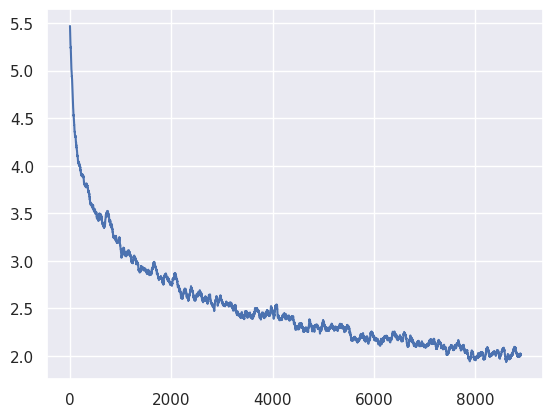

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

# **Testing**

In [1]:
# Prompt the user to enter the target language for translation
target_lang = input("Enter the target language (e.g., 'en' for English): ")

# Fetch the test sentence from the dataset (assuming it's in Filipino)
test_sentence = test_dataset[0]['translation']['th']
print('Raw input text:', test_sentence)

# Encode the input sentence for translation into the specified target language
input_ids = encode_input_str(
    text=test_sentence,
    target_lang=target_lang,
    tokenizer=tokenizer,
    seq_len=model.config.max_length,
    lang_token_map=LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))


Enter the target language (e.g., 'en' for English): en


NameError: name 'test_dataset' is not defined

In [77]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

They have confirmed that the semi-final race at the Sydney Landmark Racecourse in
They have confirmed that the semi-final race at the Sydney Landmark Racecourse,
They have confirmed that the semi-final race at the Sydney Landmark Racecourse at


In [ ]:
#@title Slick Blue Translate
input_text = 'A surfboarder ran into a shark' #@param {type:"string"}
output_language = 'en' #@param ["en", "ja", "zh"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))